# Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/HR Employee data.csv")
df

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,1,240,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13419,113419,2021,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,1,1919,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L1
13420,113420,2021,36,Travel_Rarely,927,Product,5,Diploma,1,108,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13421,113421,2021,58,Travel_Rarely,1200,Sales,14,Bachelors,1,1836,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [3]:
df.dtypes

,0
EmployeeID,int64
JoiningYear,int64
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [4]:
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [5]:
df.drop(columns=["EmployeeCount" , "Over18" , "StandardHours"],inplace=True)

In [6]:
df.columns

Index(['EmployeeID', 'JoiningYear', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'LeavingYear', 'Reason',
       'RelievingStatus', 'office_code', 'JobLevel_updated'],
      dtype='object')

In [7]:
current_year = 2025
df["Tenure"] = df.apply(lambda row: current_year - row["JoiningYear"] if pd.isna(row["LeavingYear"]) else row["LeavingYear"] - row["JoiningYear"], axis=1)

In [8]:
df["LeavingYear"] = df["LeavingYear"].fillna("Still Employed")

In [9]:
df["Reason"] = df["Reason"].fillna("Still Active")

In [10]:
df["RelievingStatus"] = df["RelievingStatus"].fillna("Employment Ongoing")

In [11]:
df["EmploymentStatus"] = df["LeavingYear"].apply(lambda x: "Still Employed" if x == "Still Employed" else "Left")

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
EmployeeID,0
JoiningYear,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
EducationField,0
EmployeeNumber,0
EnvironmentSatisfaction,0


In [14]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.00000,13423.000000,...,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1022.222677,2.369366,65.498622,2.46316,2.388214,...,2.367504,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,5.076883
std,3875.030667,2.005345,8.126696,356.968483,6.844715,549.883093,0.941861,17.196420,0.66039,0.956279,...,0.930938,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,2.419385
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.00000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,554.000000,2.000000,52.000000,2.00000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1014.000000,2.000000,65.000000,3.00000,2.000000,...,2.000000,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,5.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1493.000000,3.000000,79.000000,3.00000,3.000000,...,3.000000,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,6.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,2068.000000,4.000000,100.000000,4.00000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,16.000000


In [15]:
df.dtypes

,0
EmployeeID,int64
JoiningYear,int64
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
EducationField,object
EmployeeNumber,int64
EnvironmentSatisfaction,int64


#Business Questions

 1. What is the average monthly income by job level?
 Insight: Helps identify if higher job levels are indeed associated with higher salaries.

In [28]:
df.groupby('JobLevel_updated')['MonthlyIncome'].mean()

,MonthlyIncome
JobLevel_updated,
L1,2899.251138
L2,6004.519404
L3,10415.146756
L4,16095.392388
L5,19200.839644
L6,16309.226316
L7,14261.875000


2. What are the most common reasons employees leave the company?
Insight: Reveals key drivers of attrition based on employee feedback.

In [29]:
df['Reason'].value_counts(normalize=True) * 100

,proportion
Reason,
Still Active,76.175222
retiring,2.324369
medical issues,2.316919
offered more money,2.234970
return to school,2.212620
long hours,2.205170
reallocation out of the area,2.093422
unhappy,2.093422
career change,1.981673


3. What is the average tenure at the company for employees who leave vs. those who stay?
Insight: Measures employee retention based on length of service.

In [30]:
df.groupby('Attrition')['YearsAtCompany'].mean()

,YearsAtCompany
Attrition,
No,2.957946
Yes,2.259850


4. What is the average performance rating by office location?
Insight: Detects geographical differences in employee performance.

In [31]:
df.groupby('office_code')['PerformanceRating'].mean()

,PerformanceRating
office_code,
BOS,2.915227
CAL,3.271925
MKM,3.210821
NYC,2.979933
OTT,3.177189
PHL,2.996616
TOR,3.218909
VAN,3.148665


5. How many employees live more than 10 km from the office?
Insight: Identifies employees who may experience long commutes and potential burnout.

In [32]:
df[df['DistanceFromHome'] > 10].shape[0]

4380

6. Does working overtime impact job satisfaction?
Insight: Measures the effect of overtime on employee happiness.

In [33]:
df.groupby('OverTime')['JobSatisfaction'].mean()

,JobSatisfaction
OverTime,
No,2.417325
Yes,2.283413


7. What percentage of married employees work in each department?
Insight: Highlights how departments differ in demographic composition.

In [34]:
df[df['MaritalStatus'] == 'Married']['Department'].value_counts(normalize=True) * 100

,proportion
Department,
Corporate Functions,17.336362
Sales,17.265370
Marketing,16.598041
Product,16.512850
Delivery,16.314071
HR,15.973307


 8. What is the average number of companies worked at, by education field?
Insight: Checks if educational background relates to job stability.

In [35]:
df.groupby('EducationField')['NumCompaniesWorked'].mean()

,NumCompaniesWorked
EducationField,
Bachelors,2.364720
Diploma,2.387941
Doctorate,2.400466
Masters,2.341463


9. Is there a correlation between working overtime and employee attrition?
Insight: Assesses whether long working hours contribute to resignations.

In [36]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
OverTime,,
No,87.415516,12.584484
Yes,35.709390,64.290610


11. What is the average tenure by employment status?
Insight: Understands if full-time vs. contract workers differ in loyalty.

 12. Does environmental satisfaction affect performance rating?
Insight: Evaluates the link between workplace environment and productivity.

In [39]:
df.groupby('EnvironmentSatisfaction')['PerformanceRating'].mean()

,PerformanceRating
EnvironmentSatisfaction,
1,3.142365
2,3.117052
3,3.085228
4,3.092680


In [38]:
df.groupby('EmploymentStatus')['Tenure'].mean()

,Tenure
EmploymentStatus,
Left,2.259850
Still Employed,5.957946


# Visuals

10. Which age group has the highest attrition rate?
Insight: Identifies age-related turnover trends.

<Axes: ylabel='Frequency'>

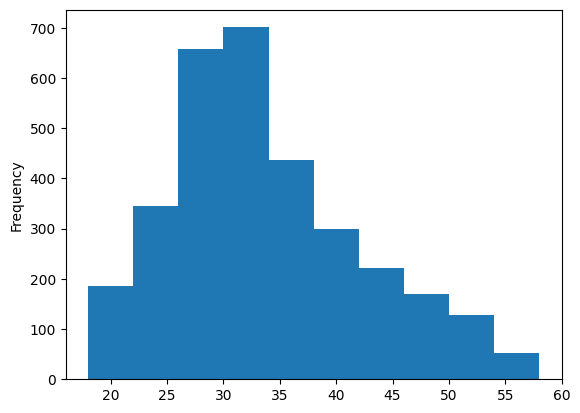

In [37]:
df[df['Attrition'] == 'Yes']['Age'].plot.hist(bins=10)

<ipython-input-16-4805d999a0b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Tenure", palette="Set2")


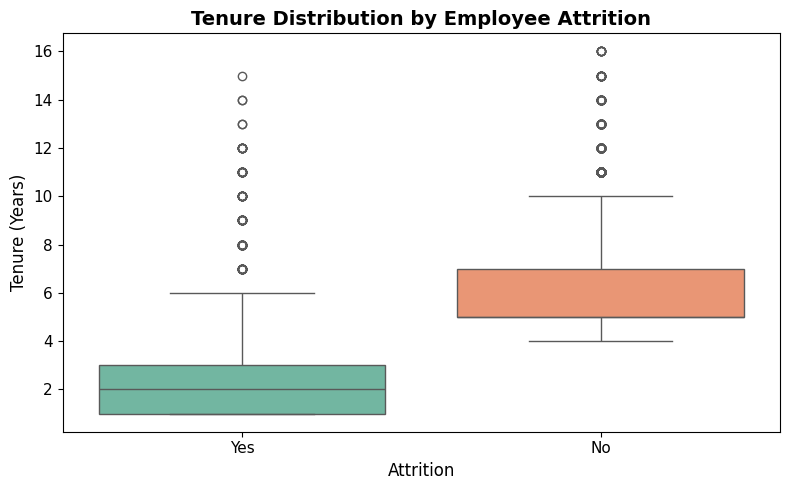

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Attrition", y="Tenure", palette="Set2")
plt.title("Tenure Distribution by Employee Attrition", fontsize=14, fontweight='bold')
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Tenure (Years)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

<ipython-input-17-2dd5aa018b1e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Attrition", y="JobSatisfaction", palette="Set2", estimator=np.mean)


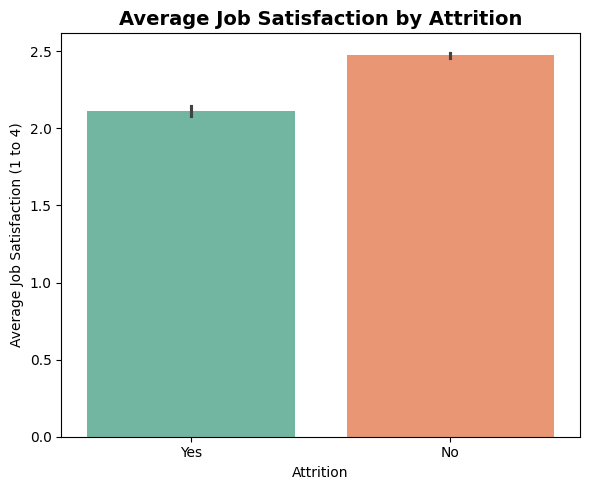

In [17]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="Attrition", y="JobSatisfaction", palette="Set2", estimator=np.mean)
plt.title("Average Job Satisfaction by Attrition", fontsize=14, fontweight='bold')
plt.ylabel("Average Job Satisfaction (1 to 4)")
plt.xlabel("Attrition")
plt.tight_layout()
plt.show()

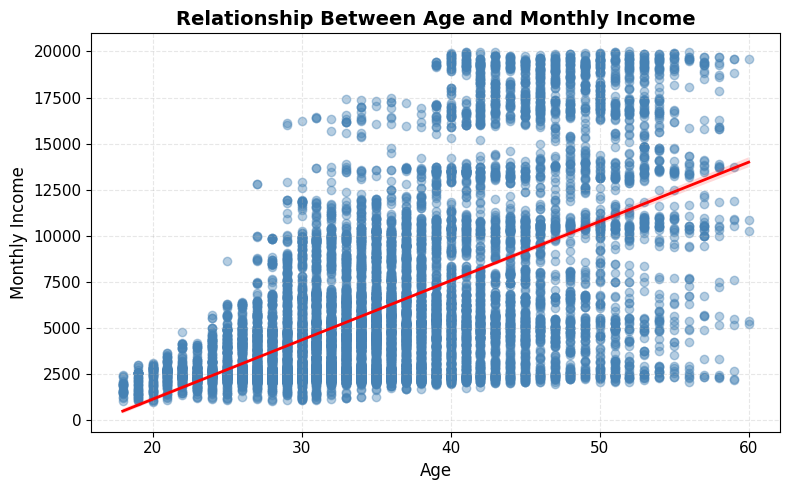

In [18]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df,
    x="Age",
    y="MonthlyIncome",
    scatter_kws={"alpha": 0.4, "color": "steelblue"},
    line_kws={"color": "red", "lw": 2}
)

plt.title("Relationship Between Age and Monthly Income", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

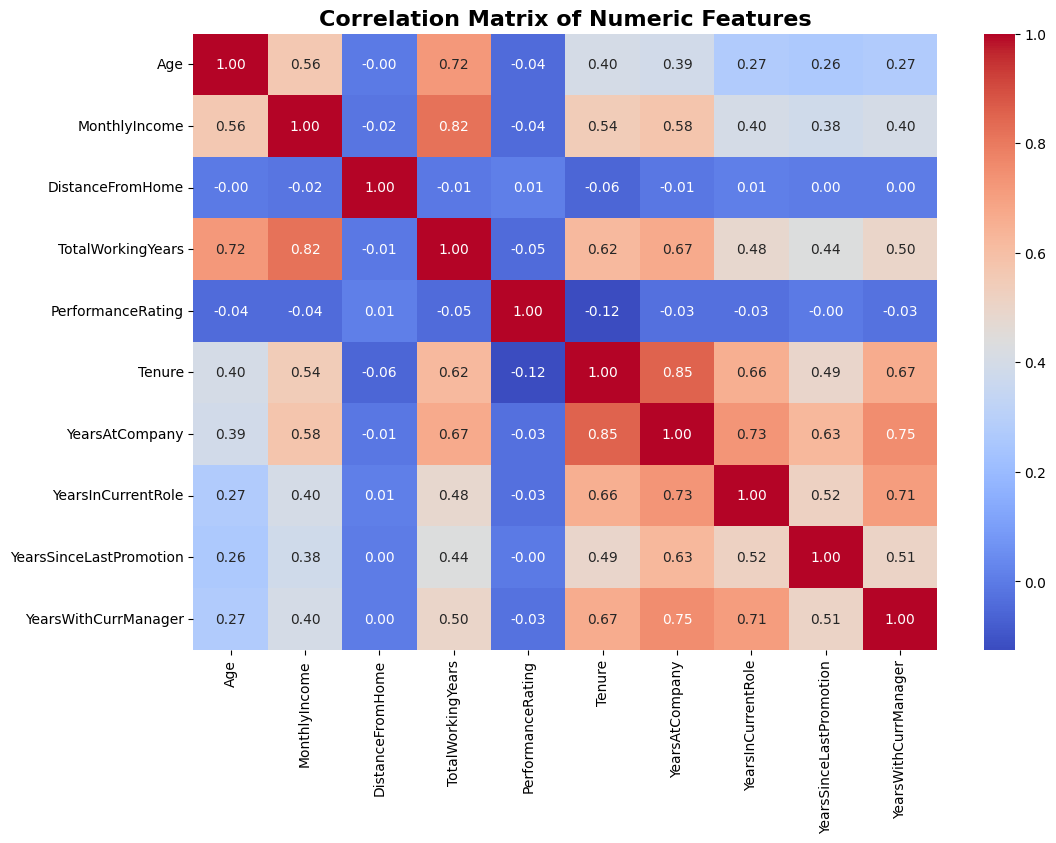

In [19]:
numeric_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'PerformanceRating', 'Tenure',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

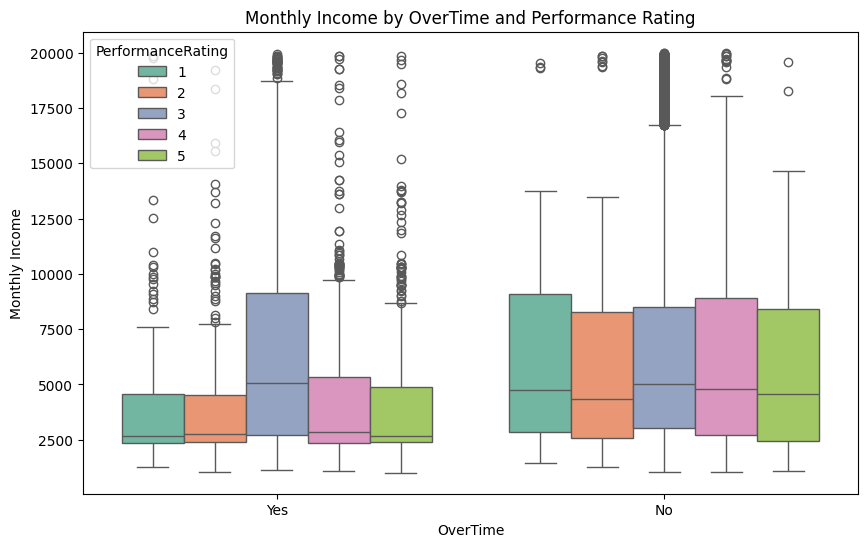

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OverTime', y='MonthlyIncome', hue='PerformanceRating', palette='Set2')
plt.title('Monthly Income by OverTime and Performance Rating')
plt.xlabel('OverTime')
plt.ylabel('Monthly Income')
plt.show()

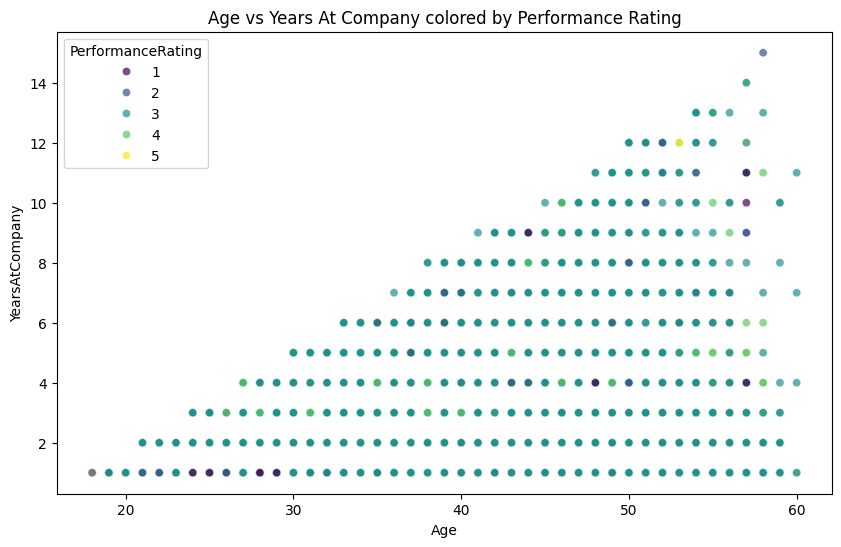

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsAtCompany', hue='PerformanceRating', palette='viridis', alpha=0.7)
plt.title('Age vs Years At Company colored by Performance Rating')
plt.show()

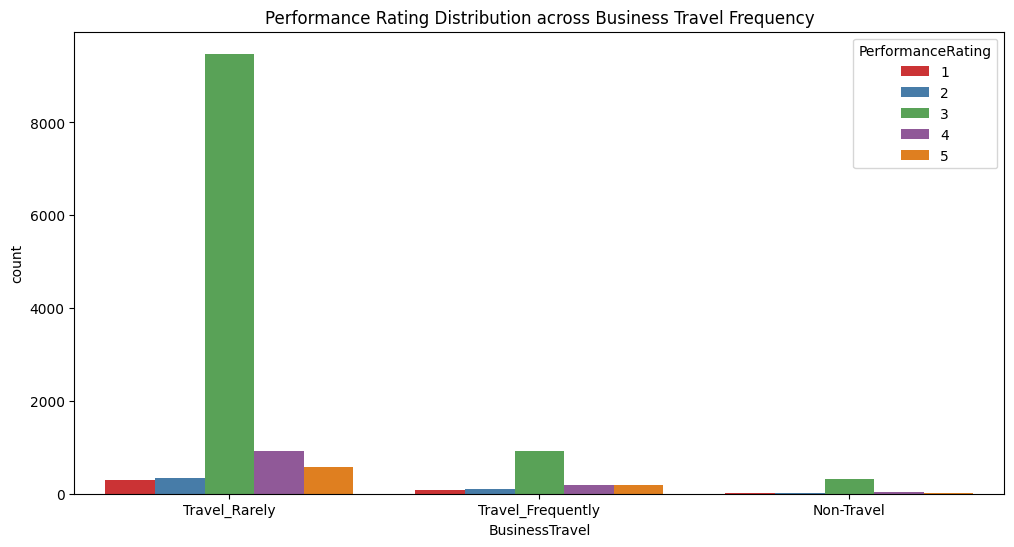

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BusinessTravel', hue='PerformanceRating', palette='Set1')
plt.title('Performance Rating Distribution across Business Travel Frequency')
plt.show()

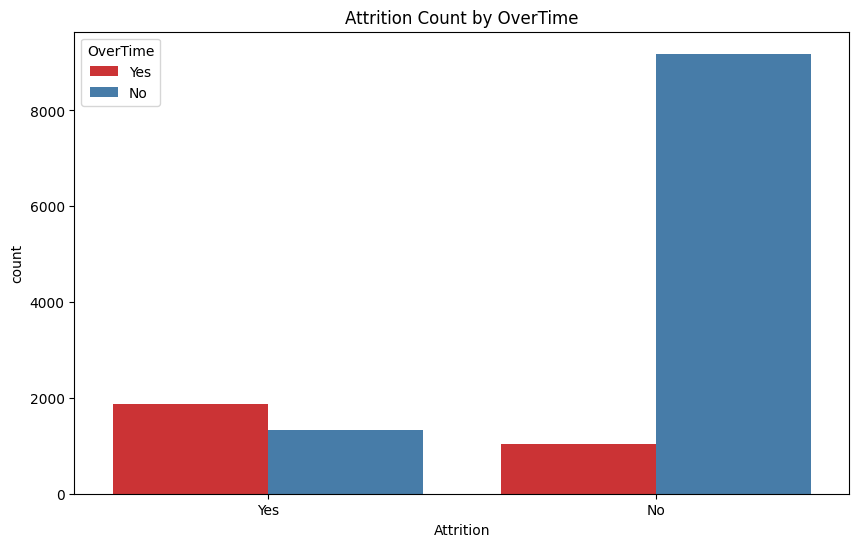

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition', hue='OverTime', palette='Set1')
plt.title('Attrition Count by OverTime')
plt.show()

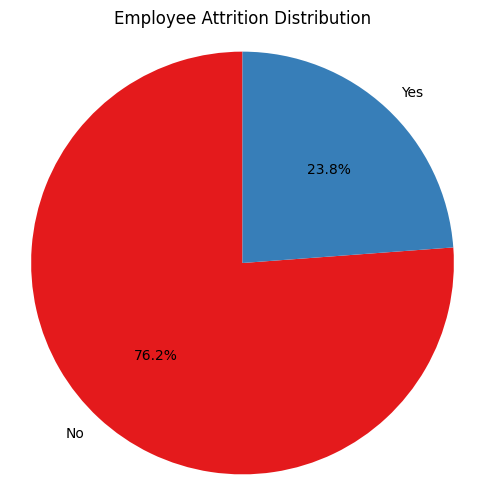

In [24]:
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

In [26]:
income_by_year = df.groupby('JoiningYear')['MonthlyIncome'].mean().reset_index()

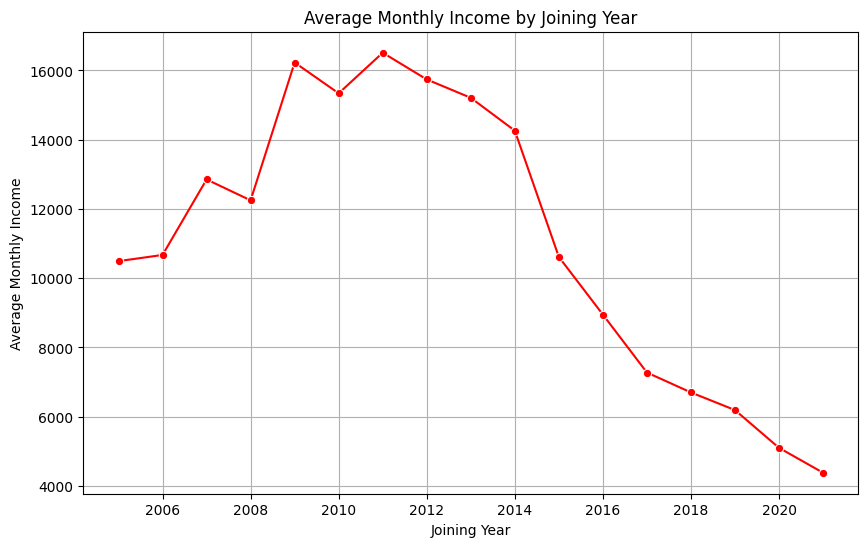

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=income_by_year, x='JoiningYear', y='MonthlyIncome', marker='o', color='red')
plt.title('Average Monthly Income by Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Average Monthly Income')
plt.grid(True)
plt.show()

In [40]:
df.to_csv("HR_Employee_data_cleaned.csv", index=False)